Hi, Since this is a classification problem, I'm going to apply Logistic Regression on the given dataset.

Importing important Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # plotting graphs

Importing datasets

In [2]:
data_train = pd.read_csv('../input/instant-gratification/train.csv')
data_test = pd.read_csv ('../input/instant-gratification/test.csv')

In [3]:
data_train.head(5)

,id,muggy-smalt-axolotl-pembus,dorky-peach-sheepdog-ordinal,slimy-seashell-cassowary-goose,snazzy-harlequin-chicken-distraction,frumpy-smalt-mau-ordinal,stealthy-beige-pinscher-golden,chummy-cream-tarantula-entropy,hazy-emerald-cuttlefish-unsorted,nerdy-indigo-wolfhound-sorted,...,wheezy-myrtle-mandrill-entropy,wiggy-lilac-lemming-sorted,gloppy-cerise-snail-contributor,woozy-silver-havanese-gaussian,jumpy-thistle-discus-sorted,muggy-turquoise-donkey-important,blurry-buff-hyena-entropy,bluesy-chocolate-kudu-fepid,gamy-white-monster-expert,target
0,707b395ecdcbb4dc2eabea00e4d1b179,-2.070654,1.018160,0.228643,0.857221,0.052271,0.230303,-6.385090,0.439369,-0.721946,...,0.351895,0.618824,-1.542423,0.598175,0.611757,0.678772,0.247059,-0.806677,-0.193649,0
1,5880c03c6582a7b42248668e56b4bdec,-0.491702,0.082645,-0.011193,1.071266,-0.346347,-0.082209,0.110579,-0.382374,-0.229620,...,-0.645115,-1.246090,2.613357,-0.479664,1.581289,0.931258,0.151937,-0.766595,0.474351,0
2,4ccbcb3d13e5072ff1d9c61afe2c4f77,-1.680473,0.860529,-1.076195,0.740124,3.678445,0.288558,0.515875,0.920590,-1.223277,...,0.516422,0.130521,-0.459210,2.028205,-0.093968,-0.218274,-0.163136,-0.870289,0.064038,1
3,e350f17a357f12a1941f0837afb7eb8d,0.183774,0.919134,-0.946958,0.918492,0.862278,1.155287,0.911106,0.562598,-1.349685,...,-1.168967,1.385089,-0.353028,3.316150,-0.524087,-0.794327,3.936365,0.682989,-2.521211,0
4,a8f910ea6075b6376af079055965ff68,-0.203933,-0.177252,0.368074,-0.701320,-1.104391,0.735760,0.894273,-1.375826,-5.144946,...,-0.279168,1.544356,2.959727,1.641201,-0.130818,-0.264292,-0.748668,0.964218,0.087079,0


In [4]:
data_test.head(5)

,id,muggy-smalt-axolotl-pembus,dorky-peach-sheepdog-ordinal,slimy-seashell-cassowary-goose,snazzy-harlequin-chicken-distraction,frumpy-smalt-mau-ordinal,stealthy-beige-pinscher-golden,chummy-cream-tarantula-entropy,hazy-emerald-cuttlefish-unsorted,nerdy-indigo-wolfhound-sorted,...,goopy-lavender-wolverine-fimbus,wheezy-myrtle-mandrill-entropy,wiggy-lilac-lemming-sorted,gloppy-cerise-snail-contributor,woozy-silver-havanese-gaussian,jumpy-thistle-discus-sorted,muggy-turquoise-donkey-important,blurry-buff-hyena-entropy,bluesy-chocolate-kudu-fepid,gamy-white-monster-expert
0,ba88c155ba898fc8b5099893036ef205,-0.155789,0.761549,1.156785,-0.272358,-1.302155,1.560988,-1.815729,-0.702968,0.435537,...,-4.207352,0.404394,0.695667,0.515584,1.339533,2.005131,-1.832629,-0.454067,-0.204909,-0.314752
1,7cbab5cea99169139e7e6d8ff74ebb77,-4.528525,-0.158527,0.616473,-0.172137,1.255351,0.064565,-1.124906,-1.826855,-1.429915,...,-0.219057,-1.473936,-1.230680,2.064435,-0.297421,-0.499721,0.138128,-1.674848,-2.368582,0.185971
2,7baaf361537fbd8a1aaa2c97a6d4ccc7,1.807488,-0.673261,0.526273,0.175929,-0.447282,-0.506135,0.080836,0.371687,-5.816214,...,-4.333965,1.213142,0.639393,0.595109,-1.492298,0.892696,2.198806,0.132664,-0.355048,0.055225
3,2e1350fe94ec9f2220bec5245e5e9265,0.972763,0.631843,0.854640,-0.040372,1.544211,-0.613590,0.742637,-0.742686,-0.192597,...,-0.272967,0.501091,0.059636,-0.815263,1.898444,-1.613323,1.755354,0.066935,0.523591,-0.790499
4,626ce222351b68b259f73de172f11249,0.092803,-0.927249,0.601406,-0.136351,-0.439235,1.734636,-2.403782,0.157426,1.147346,...,-0.211730,0.045831,-0.346738,0.558668,-1.985189,-1.011715,1.555390,0.514802,-0.886653,0.655927


In [5]:
data_train.isnull().sum()

id                                      0
muggy-smalt-axolotl-pembus              0
dorky-peach-sheepdog-ordinal            0
slimy-seashell-cassowary-goose          0
snazzy-harlequin-chicken-distraction    0
                                       ..
muggy-turquoise-donkey-important        0
blurry-buff-hyena-entropy               0
bluesy-chocolate-kudu-fepid             0
gamy-white-monster-expert               0
target                                  0
Length: 258, dtype: int64

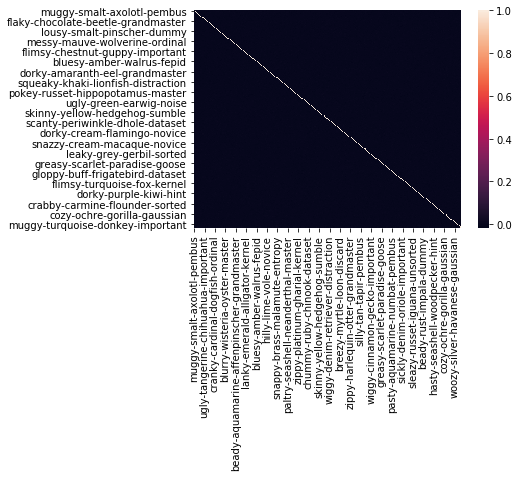

In [6]:
corr=data_train.corr()
sns.heatmap(corr)

The above heatmap shows no relationship between variables.
Splitting training data into X and y and removing ID column

In [7]:
X_train = data_train.iloc[:,1:256]
y_train = data_train.iloc[:,-1]

Initializing Test data set X_test. We will not consider ID column

In [8]:
X_test = data_test.iloc[:,1:256]

# Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
y_pred = log_reg.predict(X_train)

In [11]:
y_test=log_reg.predict(X_test)

Checking the scores of logistic regression with both training and test data

In [12]:
log_reg.score(X_train,y_train)

0.5267562866210938

In [13]:
log_reg.score(X_test,y_test)

1.0

In [14]:
from sklearn.metrics import confusion_matrix
cn = confusion_matrix(y_train,y_pred)
cn

array([[68617, 62396],
       [61662, 69469]])

In [15]:
from sklearn.metrics import precision_score,f1_score,recall_score
precision_score(y_train,y_pred)
recall_score(y_train,y_pred)
f1_score(y_train,y_pred)

0.52828940364112

There is huge difference between the scores of training data and test data,because there is no 
relation between independent and dependent variables.